In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.34098094295733 173.77409539913407
-82.57428032302815 163.76171939061646
34.81809703787317 31.394678815699677
49.24402970966062 -72.29377321742655
78.34111108244053 -93.53692447276525
9.89325365436855 -145.74489341168868
-86.5308162359982 -73.88956391141801
-3.266133203208483 -177.2117622643424
30.045852425564846 79.22248315560864
37.01994028333446 -163.82639194868003
0.3716492855665905 152.5589971277803
-36.85889875306153 53.38547759430344
83.41290949384845 169.53926732479465
52.42692088299398 -76.26729061319031
-64.1994887722465 -74.43815590811758
5.4500922835599255 175.44253640464308
62.645111030798375 68.95086734094596
89.99554972178618 -123.78790615281795
26.086779519446225 24.577647172928096
29.09034051718551 -53.73318873911819
-64.15703887607549 133.37805363853778
78.79163005076794 147.29966935368225
-29.563329282692443 77.47168443503205
-76.48894224267848 164.10735658755902
44.169766424737475 133.51928623810045
57.3468633032752 -85.42138922301956
-74.28566079005924 80.3731986

89.45255931644527 -160.64347840323904
85.22347366513307 -93.14868241214475
74.65106969731312 -92.98674781784258
19.899608736229695 28.504796535904006
72.57735550960481 0.14932996477318738
-34.60812533554357 -110.77389726174921
-86.73176404801309 -85.44821863839438
11.867870566801614 -82.2683030584869
10.22102946818562 -36.62486331964166
8.124904271939968 49.208589024902125
-4.604346082809798 -105.82365912592367
-67.64602835570908 178.96008799292838
-2.9819466561676933 89.82158881989449
77.91255802718504 -165.7849219850119
39.73356733816644 17.580948666147492
-0.9882035722886684 -58.79133781525587
6.817970475985248 98.61128516137848
9.903481792381612 94.85391563017072
-28.924422325794673 -46.53582327407261
11.801199068017766 128.34736678441834
-26.487804603055082 -86.37480672786278
-11.862415218014064 88.36636541776522
-87.18560898034599 13.534020928436206
-30.52651750040347 55.20114505567682
-12.636806342125738 -155.17667531302789
-48.582263255848765 -148.32379061170417
-58.07167897019

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | chlorakas
Processing Record 4 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | dwarahat
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | chapais
Processing Record 15 of Set 1 | gornopravdinsk
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | jalu
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | chokurdakh
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | novosysoyevka
Processing 

Processing Record 37 of Set 4 | wynyard
Processing Record 38 of Set 4 | kodinsk
Processing Record 39 of Set 4 | ginda
Processing Record 40 of Set 4 | launceston
Processing Record 41 of Set 4 | sandwick
Processing Record 42 of Set 4 | teahupoo
Processing Record 43 of Set 4 | tsotsin-yurt
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | sobolevo
Processing Record 46 of Set 4 | morehead
Processing Record 47 of Set 4 | diu
Processing Record 48 of Set 4 | isabela
Processing Record 49 of Set 4 | kodiak
Processing Record 50 of Set 4 | romilly-sur-seine
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | sorland
Processing Record 3 of Set 5 | christchurch
Processing Record 4 of Set 5 | san-pedro
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | poum
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | karamay
City not found. Skipping...
Processing Record 9 of Se

Processing Record 28 of Set 8 | ous
Processing Record 29 of Set 8 | dois vizinhos
Processing Record 30 of Set 8 | ponta delgada
Processing Record 31 of Set 8 | iralaya
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | okhotsk
Processing Record 34 of Set 8 | da nang
Processing Record 35 of Set 8 | batagay-alyta
Processing Record 36 of Set 8 | smithers
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | qiongshan
Processing Record 39 of Set 8 | odweyne
Processing Record 40 of Set 8 | spokane
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | shu
Processing Record 43 of Set 8 | faanui
Processing Record 44 of Set 8 | ikryanoye
Processing Record 45 of Set 8 | hirara
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | brae
Processing Record 48 of Set 8 | amazar
Processing Record 49 of Set 8 | sao filipe
Processing Record 50 of Set 8 | olafsvik
Processing Record 1 of Set 9 | itarem

Processing Record 20 of Set 12 | towada
Processing Record 21 of Set 12 | cairns
Processing Record 22 of Set 12 | zhicheng
Processing Record 23 of Set 12 | carnduff
Processing Record 24 of Set 12 | puerto colombia
Processing Record 25 of Set 12 | mirandela
Processing Record 26 of Set 12 | sokoto
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | sumbe
Processing Record 29 of Set 12 | chibombo
Processing Record 30 of Set 12 | uhlove
Processing Record 31 of Set 12 | bowen
Processing Record 32 of Set 12 | faya
Processing Record 33 of Set 12 | stephenville
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | northam
Processing Record 36 of Set 12 | yaransk
Processing Record 37 of Set 12 | goure
Processing Record 38 of Set 12 | daultala
Processing Record 39 of Set 12 | lang son
Processing Record 40 of Set 12 | sumenep
Processing Record 41 of Set 12 | sistranda
Processing Record 42 of Set 12 | phan thiet
Processing Record 43 of Set 12 | krivodo

In [10]:
len(city_data)

569

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.09,71,67,16.46,KI,2022-08-29 12:06:20
1,Bluff,-46.6000,168.3333,44.80,84,9,6.24,NZ,2022-08-29 12:06:21
2,Chlorakas,34.8042,32.4083,87.55,74,20,19.57,CY,2022-08-29 12:06:21
3,Thompson,55.7435,-97.8558,55.56,100,100,12.66,CA,2022-08-29 12:06:21
4,Hilo,19.7297,-155.0900,77.29,78,0,6.91,US,2022-08-29 12:03:55
5,Ushuaia,-54.8000,-68.3000,42.46,70,20,2.30,AR,2022-08-29 12:06:22
6,Dwarahat,29.7833,79.4333,70.09,93,93,3.33,IN,2022-08-29 12:06:22
7,Kapaa,22.0752,-159.3190,77.32,84,20,14.97,US,2022-08-29 12:06:23
8,Kavieng,-2.5744,150.7967,82.65,76,93,16.04,PG,2022-08-29 12:06:23
9,Pevek,69.7008,170.3133,38.12,82,48,8.12,RU,2022-08-29 12:06:23


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-08-29 12:06:20,3.0707,172.7902,82.09,71,67,16.46
1,Bluff,NZ,2022-08-29 12:06:21,-46.6000,168.3333,44.80,84,9,6.24
2,Chlorakas,CY,2022-08-29 12:06:21,34.8042,32.4083,87.55,74,20,19.57
3,Thompson,CA,2022-08-29 12:06:21,55.7435,-97.8558,55.56,100,100,12.66
4,Hilo,US,2022-08-29 12:03:55,19.7297,-155.0900,77.29,78,0,6.91


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

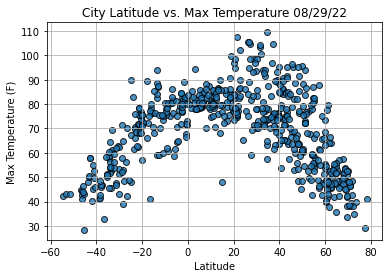

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

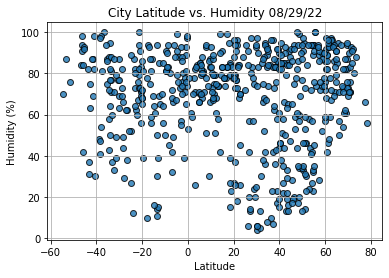

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

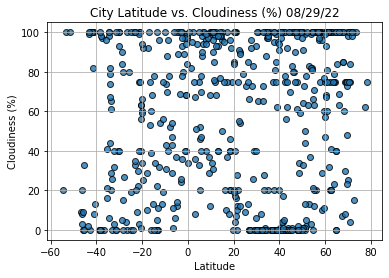

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

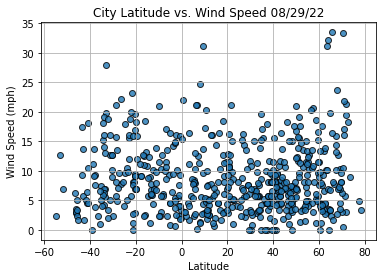

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "   ( R = " +str(round(r_value,2))+")"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    #display(r_value)

SyntaxError: unexpected character after line continuation character (2222041365.py, line 14)

In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

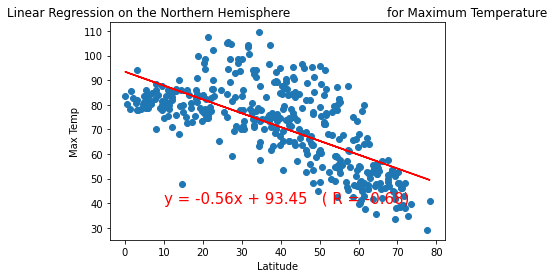

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

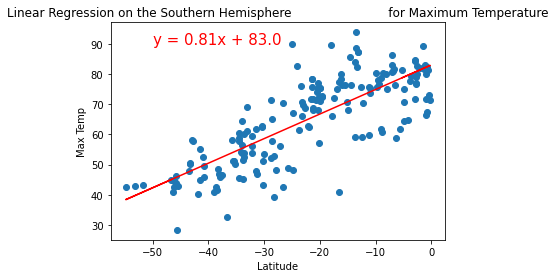

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

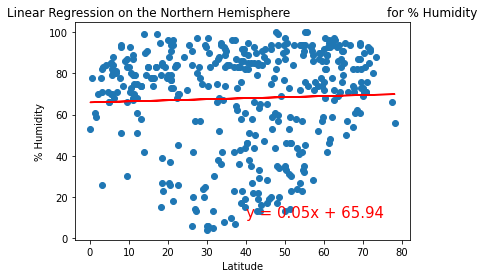

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

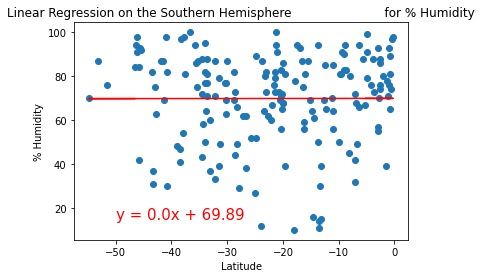

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


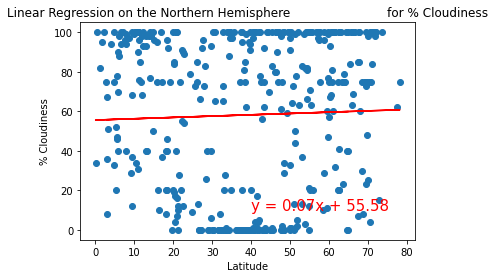

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

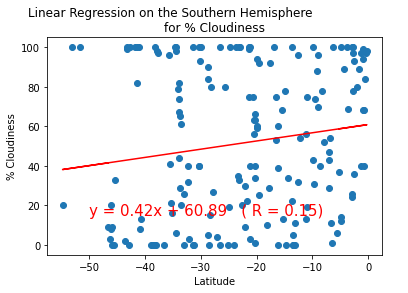

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                       \nfor % Cloudiness', '% Cloudiness',(-50,15))


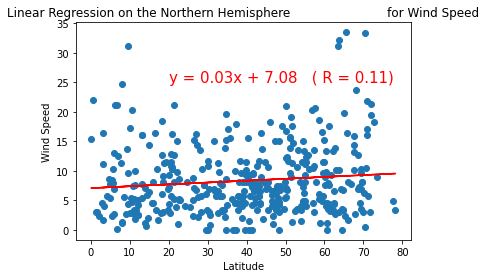

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(20,25))

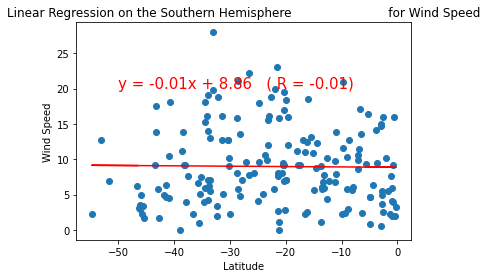

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))